<a href="https://colab.research.google.com/github/mindyng/Covid19/blob/master/Task_Treatment_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overall goal:

To identify candidate drugs anomalies, gather a collection of publications that describe existing prescriptions' influence on illness severity and outcomes.

## Deliverable: 

Get relevant collection of publications to Hilary so she can look at never-seen-before drug relationships.

## Approach:

1. Start with Michael's provided Kaggle corpus.
2. Discover overall themes within corpus.
3. Find matches between corpus and Hilary's inclusion and exclusion key word lists.
4. Further corpus analysis down the line:
  - Topic Modeling 
  - Page Rank
  - Tableau dashboard to filter out key words

## Action Items:

1. Report trends/outliers in corpus. (Mindy, Cameron)
2. Report matches in corpus. (Michael)
3. After discovering corpus themes, re-evaluating/confirming key words.



In [0]:
import numpy as np
import pandas as pd
import string
from collections import Counter

from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

import pandas as pd
import json
from pandas.io.json import json_normalize

#FIRST PAPER TEST

In [0]:
#This first_paper is all text ONLY from Methods and Results sections (manually copied and pasted; dont foresee doing this for rest of the 999 pub's)
first_paper = "2.1. The yeast cell strain Saccharomyces cerevisiae EBY100 was provided by Pacific Northwest National Laboratory (Richland, WA). The mAbs D7, D8, F10, G17, H40, A66, D80, E90, H5-2A, 11A and 80R were isolated from a human phage display library [3]. H5-2A was raised against monomeric HA0, and the other anti-H5 mAbs were obtained by panning with trimeric HA0 (highly pathogenic avian subtype H5N1 A/Vietnam/1203/04). NR2728, an HA-specific (A/Vietnam/1203/2004) mouse mAb, was obtained through the NIH Biodefense and Emerging Infections Research Resources Repository (Manassas, VA). The reassortant H5N1 avian influenza virus VNH5N1-PR8/CDC-RG, which contains HA and NA genes derived from A/Vietnam/1203/2004 was obtained from the Center for Disease Control (CDC, Atanta, GA) and propagated in Madin Darby Canine Kidney (MDCK) cells at The New England Regional Center of Excellence for Biodefense and Emerging Infectious Diseases (NERCE) at Harvard Medical School (Boston, MA).The full-length protein (HA0) and its subunits (HA1 and HA2) were cloned into a yeast display vector, pCTCON2 (from Dane Wittrup, Massachusetts Institute of Technology, Cambridge, MA). Briefly, HA0, HA1 or HA2 gene fragments of A/Vietnam/1203/2004 were PCR-amplified using the pAcGP67A-HA vector [3] as template and specific primers and cloned into the pCTCON2 yeast vector in-frame with the endogenous yeast Aga2p signal peptide and aga2 gene at the N-terminal end and cMyc at the C-terminal end (Fig. 1A). The resulting plasmids were transformed into competent yeast using the Frozen-EZ Yeast Transformation Kit (Zymo Research, Irvine, CA), which were then grown on synthetic dextrose plus casein amino acids (SD-CAA) agar plates under dual selection (Ura- and Trp-) at 30 °C for 3 days. Single colonies were grown overnight in 5 ml SD-CAA medium (20 g/L glucose, 6.7 g/L yeast nitrogen base without amino acids, 5.4 g/L Na2HPO4, 8.6 g/L NaH2PO4·H2O and 5 g/L casamino acids) at 30 °C with shaking. Expressions of HA proteins were induced with galactose in SG-CAA medium (similar to SD-CAA medium except dextrose was replaced by galactose) at 20 °C for 3 days. Surface expression of the HA0 and its subunits were confirmed by FACS (BD FacsCalibur, BD Biosciences, San Jose, CA; FlowJo software, Tree Star, Ashland, OR) using anti-cMyc directed towards the C-terminal tag. After induction (Section 2.2), cells were washed with PBS 0.5% BSA (PBS-B), probed with anti-cMyc (1:200 in PBS-B; 1 h, 25 °C) and then stained with anti-chicken Alexa 488-conjugated antibody (Invitrogen, Carlsbad, CA; 30 min, 4 °C). For binding specificity of surface-expressed HAs, the induced cells were incubated with anti-HA antibodies (1 h, 25 °C), followed by a FITC-conjugated goat anti-human or anti-mouse IgG (30 min, 4 °C). Yeast cells expressing the HA1 subunit were probed with unlabeled H5-2A or NR-2728 mAb for 1 h at 4 °C. Unbound antibodies were removed after three washes with PBS-B. H5-2A and NR2728 were conjugated using an Alexa Fluor 647 mAb labeling kit (Invitrogen). Conjugated H5-2A or NR2728 was then added to the cells for 1 h at 4 °C. Yeast cells were washed three times with PBS-B and analyzed by FACS. Yeast surface-expressed HA proteins were resolved using SDS–polyacrylamide gel electrophoresis and electrophoretically transferred to a nitrocellulose membrane. After blocking with 5% skim milk overnight, the blot was probed with anti-H5 polyclonal antibody (1 h, 25 °C), followed by horseradish peroxidase (HRP)-conjugated anti-mouse IgG (1 h, 25 °C). Proteins were detected using the West Pico Chemiluminescent Substrate (Thermo Scientific, Rockford, IL) and exposure to autoradiography film. A library of HA1 mutants was generated by an error-prone PCR method using the GeneMorph II random mutagenesis kit (Invitrogen). The HA1 subunit was amplified from pCTCON2-HA1 using the primers: pctcon2-MUT-F, 5′-CGACGATTGAAGGTAGATACCCATACGACGTTCCAGACTACGCTCTGCAG-3′; pctcon2-MUT-R, 5′-CAGATCTCGAGCTATTACAAGTCCTCTTCAGAAATAAGCTTTTGTTC-3′. Five micrograms of each gel-purified construct containing the mutant HA1 sequence were co-transformed with a NheI/BamHI-digested pCTCON2 vector into competent yeast cells and cultured on SD-CAA plates. The transformed cells were serially titrated on SD-CAA agar plates to determine the size of the library. The yeast library was grown in SD-CAA medium and induced to display proteins as described in Section 2.2. Surface expression of the HA1 mutant library was induced (Section 2.2) before each round of FACS selection for mutants binding only by mAb H5-2A or NR2728 mAbs after double staining with both antibodies (1 h, 25 °C), followed by secondary PE-conjugated anti-human IgG and FITC-conjugated anti-mouse IgG (30 min, 4 °C). Yeast cell populations binding exclusively to H5-2A or NR2728 were sorted on a DakoCytomation High Speed MoFloSorter (DaKoCytomation, Fort Collins, CO) and enriched in SD-CAA medium. After a second round of selection and sorting, the cells were plated to isolate individual clones and binding specificity confirmed by FACS. Plasmids from yeast clones binding exclusively to H5-2A or NR2728 mAbs were recovered (Zymoprep Yeast Plasmid Miniprep Kit, Zymo Research) and DNA sequenced using the primers pCTCON2-F, 5′-GTTCCAGACTACGCTCTGCAGG and pCTCON2-R, 5′-GATTTTGTTACATCTACACTGTTG. The inhibition of hemagglutination by mAb H5-2A or NR2728 was performed to assess antibody response to the H5N1 virus. Twofold dilutions of mAb samples were mixed with reassortant H5N1 virus at a concentration of 4 HA units per well and incubated for 30 min at RT. Fifty microliters of a 0.5% suspension of turkey RBCs were added to each well, and hemagglutination was assessed visually after 1 h. For determination of linear versus conformational epitopes, the yeast surface-expressed HA1 subunit was denatured by heating the yeast cells at 80 °C for 30 min. After chilling on ice for 20 min, cells were labeled with H5-2A or NR-2728 mAb, followed by a FITC-conjugated IgG for FACS analysis. The yeast surface display system utilizes the α-agglutinin adhesion receptor composed of the Aga1p and Aga2p proteins to display recombinant proteins. The cDNA sequences of HA0 or its subunits without the associated signal peptide and transmembrane domain were separately cloned in-frame with the endogenous yeast Aga2p signal peptide and aga2 gene at the N-terminal end and cMyc at the C-terminal end (Fig. 1A). When transformed in yeast expressing endogenous Aga1, the heterologous HA fused to Aga2 is displayed on the surface via disulfide bonds between Aga2p and Aga1p. The HA0 and each of the subunits were determined to be successfully displayed on the yeast surface at comparable levels by FACS staining of the C-terminal cMyc tag or HA protein itself (Fig. 1B). Western blotting with anti-HA polyclonal antibody showed bands at expected sizes for HA0 (105 kDa), HA1 (80 kDa) and HA2 (60 kDa), confirming that the surface-displayed HA proteins were expressed as fusions to Aga2p (∼28 to 30 kDa) (Fig. 1C). To determine immunoreactivity and specificity of the displayed HA0 protein, a panel of anti-HA mAbs previously shown to bind to a discontinuous and conformationally sensitive epitope was assayed for binding with the displayed HA proteins using FACS (Fig. 2A). The HA0 reacted with eight different anti-HA mAbs (D7, D8, F10, G17, H40, A66, D80 and E90) that each were previously reported to have broad-spectrum and extremely potent neutralization activity and to bind to a highly conserved conformational epitope on the HA membrane-proximal stem region [3]. The X-ray co-crystal structure of the HA-F10 mAb complex showed that the F10 mAb is directed toward a conformation-dependent region shared by both HA1 and HA2 [3]. Here, it was further demonstrated by binding of the F10 mAb that monomeric HA0 was expressed in its correctly folded conformation on yeast cells, and this interaction was lost after denaturation of the target protein (Fig. 2B). As expected, no immunoreactivity was detected to the negative controls 11A and 80R (mAbs against the S1 domain the SARS-CoV spike protein) (Fig. 2A). After demonstrating that yeast-displayed HA0 could bind to antibodies with known specificities, this system was tested by mapping two HA-reactive antibodies for which the specific epitopes were not previously known. The binding specificities to the yeast surface-displayed HA protein or its subunits of the human H5-2A and the mouse NR2728 mAbs were analyzed by FACS. Both H5-2A and NR2728 mAbs bound to surface-displayed HA0 and HA1 but not HA2, suggesting that they have contact residues mapping specifically to the HA1 subunit (Fig. 3A). Further analyses revealed that both H5-2A and NR2728 retained their binding reactivities to the yeast surface-displayed HA1 after heat denaturation, suggesting that they bind to linear or continuous epitopes (Fig. 3B). In order to use this yeast system for future influenza antibody studies, it was important to demonstrate its broad capability for fine mapping HA-specific antibodies. Therefore, low rate mutagenesis by an error-prone PCR method was used to generate a mutant HA1 gene library of about 2 × 105 clones as determined by plating serial dilutions of the transformed yeast cells. The H5-2A and NR2728 mAbs were further characterized in these fine mapping studies. The library was screened by two rounds of FACS to select yeast clones with selective loss of binding to H5-2A or NR2728 but that retained surface expression of HA and binding to other HA-specific antibodies. Fifty individual clones isolated by sorting were sequenced and evaluated to identify the binding epitope on the HA protein. Multiple mutants containing a single amino acid alteration in HA1 were identified by DNA sequencing, and several of these mutations conferred considerable and selective loss of binding to one of the two anti-HA mAbs. Five mutations (T206, N210, Q211, R212 and K238) abolished binding of the H5-2A mAb, while binding of anti-cMyc and NR2728 were unchanged (Fig. 4A top). The binding epitope of H5-2A was mapped to a conserved loop on HA1, which is distant from the receptor binding sites. The sequence of the H5-2A epitope located in the loop of HA1 was highly H5-strain specific and not found in any other subtypes among the total of 10,815 unique HA sequences available in a public influenza database (http://www.ncbi.nlm.nih.gov/genomes/FLU/FLU.html) as of Feb. 24, 2011 (Sup. Table 1). Five of the HA mutations (S125, H129, Y161, I164 and R166) caused total loss of NR2728 binding, while binding of H5-2A as well as anti-cMyc were unchanged (Fig. 4A bottom). In the competitive binding assay, unlabeled H5-2A did not cross-compete with labeled NR2728 (Alexa Flour 647) but did self-compete with labeled H5-2A (Alexa Flour 647) for binding to the HA1 subunit (Fig. 4C). Analysis of the location of mutations in the selected clones indicated that NR2728 binds to HA1 at an interface overlapping with the receptor binding site by forming a contiguous patch on the solvent-exposed surface of the receptor binding site, whereas H5-2A binds to a loop on HA1 away from the receptor binding site (RBS) (Fig. 4B, left and middle). Within the trimeric HA crystal structure, the NR2728 epitope is fully exposed, while the H5-2A epitope is cryptic at the interface of the HA monomers (Fig. 4B, right). The results of both the competitive binding assay (Fig. 4C) and the mapping of the loss-of-binding mutations (Fig. 4B) indicated that these two mAbs had non-identical/non-overlapping epitopes (Fig. 4B). The binding epitopes on HA for H5-2A and NR2728 were also tested for functionality in a HI assay. In contrast to H5-2A which did not inhibit the agglutination of turkey RBCs mediated by the influenza strain H5N1, NR2728 showed strong inhibitory activity in this assay (Fig. 4D). Of note, the potently neutralizing F10 mAb which targets the HA stem region had virtually no activity in the HI assay (Fig. 4D), which is consistent with our previous work showing that this antibody inhibits influenza by a mechanism other than blocking virus binding to host cells [3]. Taken together, these results suggest that the specific interaction of NR2728 with the HA RBS resulted in its potent inhibition of virus attachment to sialic acid receptors. " 

#Clean up paper
first_paper = first_paper.lower().translate(str.maketrans('', '', string.punctuation))
first_paper

#Tokenize paper string and get rid of frequent, unimportant words for our use case
tokens = first_paper.split() #total: 1907
stop_words = stopwords.words('english')
clean_first_paper = [word for word in tokens if word not in stop_words] #len of output 1267

## EDA

### What is word frequency as top 25 most common words and word cloud?

In [4]:
counts = Counter(clean_first_paper)
counts.most_common(25)

[('yeast', 27),
 ('binding', 27),
 ('h52a', 25),
 ('nr2728', 22),
 ('ha1', 20),
 ('ha', 19),
 ('fig', 19),
 ('cells', 14),
 ('°c', 14),
 ('ha0', 13),
 ('mabs', 12),
 ('mab', 12),
 ('using', 10),
 ('facs', 9),
 ('1', 9),
 ('30', 8),
 ('proteins', 8),
 ('h', 8),
 ('library', 7),
 ('3', 7),
 ('protein', 7),
 ('sdcaa', 7),
 ('surface', 7),
 ('antibodies', 7),
 ('epitope', 7)]

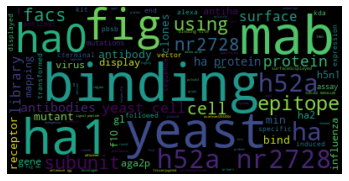

In [5]:
listToStr = ' '.join([str(elem) for elem in clean_first_paper]) 

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(listToStr)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Any of the key words from features_set exist in clean_first_paper?

In [0]:
features_set = ["in silico",	"in vitro",	"in vivo",	"NCIP",	"PARS", "clinical", "clinical characteristics",	"critically ill	patients",	"case", "case study", "case report", "case series",	"ICU",	"hospital",	"epidemiological", "epidemilogy",	"retrospective",	"demographic",	"treatment",	"ICU", "Intensive care unit",	"Hospital",	"Epidemiological", "Epidemiology",	"Retrospective",	"Demographic",	"Treatment",	"Noncritically ill", 	"ARDS",	"Men", "Man",	"Women", "Woman",	"not Male", "not female",	"Symptoms",	"Affected health professionals",	"IQR", "Interquartile Range",	"Prothrombin time",	"Hemoglobin",	"Lactate dehydrogenase",	"Lymphocyte",	"CT", "Computed tomography", "Chest computed tomography", "Chest computed tomography scans",	"hospital admission",	"dyspnea",	"anorexia",	"cough",	"myalgia",	"fatigue",	"arrhythmia",	"shock", "ground",	"glass opacity",	"patchy shadows",	"non-invasive ventilation",	"ventilation",	"physician notes",	"extracorporeal",	"diagnostic",	"comorbidities",	"intervention",	"dysfunction",	"oxygen",	"high flow",	"patient to patient",	"underlying conditions"]
features = []
for word in features_set:
  features.append(word.lower())

In [7]:
if any(x in clean_first_paper for x in features):
  print(True)
else:
  print(False)

False


Conclusion: There are no key words in the first paper.

# Applying above to the whole corpus.




In [0]:
# json.load((open('')))